In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

15

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/45".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/45
number of class1:481
number of class2:1136

 ****** Running generation 0 ****** 

Population's average fitness: 0.53625 stdev: 0.14026
Best fitness: 0.77365 - size: (2, 13) - species 6 - id 134
Average adjusted fitness: 0.273
Mean genetic distance 2.859, standard deviation 0.489
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 19.945 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59627 stdev: 0.13945
Best fitness: 0.77365 - size: (2, 13) - species 6 - id 134
Average adjusted fitness: 0.298
Mean genetic distance 2.972, standard deviation 0.483
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.528 sec (19.737 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63854 stdev: 0.11624
Best fitness: 0.79654 - size: (4, 16) - species 27 - id 536
Average adjusted fitness: 0.439
Mean genetic distance 3.003, standard deviation 0.465
Population of 203 members in 30 speci

Population's average fitness: 0.70817 stdev: 0.11059
Best fitness: 0.82251 - size: (6, 19) - species 32 - id 2888
Average adjusted fitness: 0.489
Mean genetic distance 3.147, standard deviation 0.507
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 25.302 sec (27.917 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.70123 stdev: 0.11917
Best fitness: 0.82251 - size: (6, 19) - species 32 - id 2888
Average adjusted fitness: 0.404
Mean genetic distance 3.122, standard deviation 0.504
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 25.386 sec (27.887 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.69924 stdev: 0.12430
Best fitness: 0.82931 - size: (8, 29) - species 7 - id 3727
Average adjusted fitness: 0.403
Mean genetic distance 3.112, standard deviation 0.510
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 25.565 sec (27.906 average)

 *

Population's average fitness: 0.70446 stdev: 0.13244
Best fitness: 0.86395 - size: (12, 33) - species 7 - id 7310
Average adjusted fitness: 0.499
Mean genetic distance 3.106, standard deviation 0.575
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 31.469 sec (31.252 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.71360 stdev: 0.12569
Best fitness: 0.86395 - size: (12, 33) - species 7 - id 7310
Average adjusted fitness: 0.424
Mean genetic distance 3.106, standard deviation 0.548
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 32.544 sec (31.526 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.71839 stdev: 0.12680
Best fitness: 0.86395 - size: (12, 33) - species 7 - id 7310
Average adjusted fitness: 0.421
Mean genetic distance 3.098, standard deviation 0.566
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 32.867 sec (31.780 average)

 

Population's average fitness: 0.60425 stdev: 0.13900
Best fitness: 0.77737 - size: (3, 13) - species 4 - id 809
Average adjusted fitness: 0.294
Mean genetic distance 3.154, standard deviation 0.495
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 21.377 sec (19.915 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62666 stdev: 0.13188
Best fitness: 0.77737 - size: (3, 13) - species 4 - id 809
Average adjusted fitness: 0.319
Mean genetic distance 3.189, standard deviation 0.496
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 21.843 sec (20.190 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62464 stdev: 0.13120
Best fitness: 0.77737 - size: (3, 13) - species 4 - id 809
Average adjusted fitness: 0.321
Mean genetic distance 3.181, standard deviation 0.484
Population of 210 members in 38 species
Total extinctions: 0
Generation time: 22.084 sec (20.427 average)

 ****** R

Population's average fitness: 0.64047 stdev: 0.13691
Best fitness: 0.80148 - size: (6, 21) - species 7 - id 3964
Average adjusted fitness: 0.350
Mean genetic distance 3.212, standard deviation 0.537
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 25.832 sec (25.229 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65748 stdev: 0.12405
Best fitness: 0.80148 - size: (6, 21) - species 7 - id 3964
Average adjusted fitness: 0.362
Mean genetic distance 3.225, standard deviation 0.537
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 26.124 sec (25.438 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63785 stdev: 0.13576
Best fitness: 0.80148 - size: (6, 21) - species 7 - id 3964
Average adjusted fitness: 0.356
Mean genetic distance 3.219, standard deviation 0.544
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 26.094 sec (25.628 average)

 ***

Population's average fitness: 0.66826 stdev: 0.12542
Best fitness: 0.81385 - size: (9, 23) - species 51 - id 7233
Average adjusted fitness: 0.367
Mean genetic distance 3.246, standard deviation 0.544
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 28.794 sec (28.333 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.67392 stdev: 0.12383
Best fitness: 0.81385 - size: (9, 23) - species 51 - id 7233
Average adjusted fitness: 0.369
Mean genetic distance 3.262, standard deviation 0.565
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 28.574 sec (28.519 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.66053 stdev: 0.12943
Best fitness: 0.81385 - size: (9, 23) - species 51 - id 7233
Average adjusted fitness: 0.386
Mean genetic distance 3.251, standard deviation 0.562
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 29.952 sec (28.802 average)

 

Population's average fitness: 0.66932 stdev: 0.10088
Best fitness: 0.83055 - size: (5, 22) - species 1 - id 993
Average adjusted fitness: 0.316
Mean genetic distance 3.095, standard deviation 0.478
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 22.220 sec (20.861 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65509 stdev: 0.11679
Best fitness: 0.83302 - size: (5, 18) - species 31 - id 1840
Average adjusted fitness: 0.407
Mean genetic distance 3.135, standard deviation 0.496
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 22.748 sec (21.254 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65759 stdev: 0.10672
Best fitness: 0.83302 - size: (5, 18) - species 31 - id 1840
Average adjusted fitness: 0.336
Mean genetic distance 3.126, standard deviation 0.502
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 23.616 sec (21.647 average)

 **

Population's average fitness: 0.69667 stdev: 0.12788
Best fitness: 0.87570 - size: (11, 34) - species 11 - id 4283
Average adjusted fitness: 0.409
Mean genetic distance 3.241, standard deviation 0.547
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 28.380 sec (26.790 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.68879 stdev: 0.12914
Best fitness: 0.87570 - size: (11, 34) - species 11 - id 4283
Average adjusted fitness: 0.336
Mean genetic distance 3.243, standard deviation 0.549
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 28.315 sec (27.092 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.68281 stdev: 0.13274
Best fitness: 0.87570 - size: (11, 34) - species 11 - id 4283
Average adjusted fitness: 0.342
Mean genetic distance 3.258, standard deviation 0.546
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 28.165 sec (27.362 average)

Population's average fitness: 0.68854 stdev: 0.12827
Best fitness: 0.88188 - size: (10, 32) - species 35 - id 7821
Average adjusted fitness: 0.319
Mean genetic distance 3.309, standard deviation 0.575
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 30.456 sec (30.942 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.68418 stdev: 0.13268
Best fitness: 0.88188 - size: (10, 32) - species 35 - id 7821
Average adjusted fitness: 0.294
Mean genetic distance 3.340, standard deviation 0.578
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 31.558 sec (31.069 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.70062 stdev: 0.13124
Best fitness: 0.88559 - size: (12, 38) - species 35 - id 9220
Average adjusted fitness: 0.357
Mean genetic distance 3.330, standard deviation 0.591
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 30.789 sec (31.121 average)

Population's average fitness: 0.62038 stdev: 0.08860
Best fitness: 0.76871 - size: (6, 22) - species 26 - id 1795
Average adjusted fitness: 0.237
Mean genetic distance 3.181, standard deviation 0.484
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 24.675 sec (23.029 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61507 stdev: 0.10030
Best fitness: 0.78231 - size: (8, 26) - species 5 - id 2252
Average adjusted fitness: 0.277
Mean genetic distance 3.202, standard deviation 0.487
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 26.481 sec (23.590 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62223 stdev: 0.09252
Best fitness: 0.78231 - size: (8, 26) - species 5 - id 2252
Average adjusted fitness: 0.250
Mean genetic distance 3.223, standard deviation 0.491
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 24.226 sec (23.813 average)

 **

Population's average fitness: 0.62326 stdev: 0.09923
Best fitness: 0.78231 - size: (8, 26) - species 5 - id 2252
Average adjusted fitness: 0.259
Mean genetic distance 3.344, standard deviation 0.495
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 27.711 sec (26.823 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.62365 stdev: 0.09591
Best fitness: 0.78231 - size: (8, 26) - species 5 - id 2252
Average adjusted fitness: 0.241
Mean genetic distance 3.317, standard deviation 0.514
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 26.676 sec (26.866 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.62400 stdev: 0.09299
Best fitness: 0.78231 - size: (8, 26) - species 5 - id 2252
Average adjusted fitness: 0.240
Mean genetic distance 3.323, standard deviation 0.519
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 27.122 sec (26.916 average)

 ***

Population's average fitness: 0.62109 stdev: 0.09858
Best fitness: 0.79221 - size: (9, 25) - species 5 - id 6403
Average adjusted fitness: 0.260
Mean genetic distance 3.325, standard deviation 0.531
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 29.894 sec (29.857 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.61021 stdev: 0.10079
Best fitness: 0.79221 - size: (9, 25) - species 5 - id 6403
Average adjusted fitness: 0.253
Mean genetic distance 3.344, standard deviation 0.529
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 31.012 sec (29.969 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.62970 stdev: 0.09302
Best fitness: 0.79221 - size: (9, 25) - species 5 - id 6403
Average adjusted fitness: 0.269
Mean genetic distance 3.343, standard deviation 0.536
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 30.929 sec (30.209 average)

 ***

Population's average fitness: 0.73168 stdev: 0.16682
Best fitness: 0.86271 - size: (4, 17) - species 27 - id 678
Average adjusted fitness: 0.536
Mean genetic distance 3.102, standard deviation 0.513
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 23.385 sec (22.879 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.71329 stdev: 0.18536
Best fitness: 0.86271 - size: (4, 17) - species 27 - id 678
Average adjusted fitness: 0.508
Mean genetic distance 3.126, standard deviation 0.509
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 23.644 sec (23.058 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72379 stdev: 0.17485
Best fitness: 0.86271 - size: (4, 17) - species 27 - id 678
Average adjusted fitness: 0.526
Mean genetic distance 3.135, standard deviation 0.508
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 23.777 sec (23.193 average)

 ***

Population's average fitness: 0.71914 stdev: 0.16456
Best fitness: 0.87322 - size: (8, 23) - species 37 - id 4772
Average adjusted fitness: 0.533
Mean genetic distance 3.174, standard deviation 0.569
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 30.739 sec (28.801 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.71939 stdev: 0.17679
Best fitness: 0.87322 - size: (8, 23) - species 37 - id 4772
Average adjusted fitness: 0.542
Mean genetic distance 3.201, standard deviation 0.557
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 31.230 sec (29.185 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.73862 stdev: 0.15399
Best fitness: 0.87322 - size: (8, 23) - species 37 - id 4772
Average adjusted fitness: 0.539
Mean genetic distance 3.228, standard deviation 0.550
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 30.959 sec (29.473 average)

 

Population's average fitness: 0.54768 stdev: 0.07104
Best fitness: 0.75943 - size: (2, 12) - species 9 - id 373
Average adjusted fitness: 0.158
Mean genetic distance 3.023, standard deviation 0.487
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 19.059 sec (18.693 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55908 stdev: 0.07992
Best fitness: 0.75943 - size: (2, 12) - species 9 - id 373
Average adjusted fitness: 0.273
Mean genetic distance 3.020, standard deviation 0.479
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 20.342 sec (19.243 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56169 stdev: 0.07973
Best fitness: 0.76252 - size: (3, 15) - species 31 - id 621
Average adjusted fitness: 0.241
Mean genetic distance 3.019, standard deviation 0.478
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 21.386 sec (19.779 average)

 ****** 

Population's average fitness: 0.61988 stdev: 0.09407
Best fitness: 0.80396 - size: (6, 22) - species 26 - id 2958
Average adjusted fitness: 0.253
Mean genetic distance 3.202, standard deviation 0.507
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 25.368 sec (24.934 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62832 stdev: 0.09245
Best fitness: 0.80396 - size: (6, 22) - species 26 - id 2958
Average adjusted fitness: 0.200
Mean genetic distance 3.232, standard deviation 0.518
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 25.065 sec (24.916 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63557 stdev: 0.09443
Best fitness: 0.80396 - size: (6, 22) - species 26 - id 2958
Average adjusted fitness: 0.265
Mean genetic distance 3.252, standard deviation 0.519
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 26.032 sec (25.076 average)

 

Population's average fitness: 0.64661 stdev: 0.09992
Best fitness: 0.80396 - size: (6, 22) - species 26 - id 2958
Average adjusted fitness: 0.205
Mean genetic distance 3.230, standard deviation 0.532
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 30.978 sec (30.475 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65316 stdev: 0.09922
Best fitness: 0.80396 - size: (6, 22) - species 26 - id 2958
Average adjusted fitness: 0.197
Mean genetic distance 3.193, standard deviation 0.550
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 29.242 sec (30.398 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.65456 stdev: 0.10090
Best fitness: 0.81694 - size: (8, 24) - species 33 - id 7539
Average adjusted fitness: 0.246
Mean genetic distance 3.198, standard deviation 0.552
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 30.321 sec (30.389 average)

 

Population's average fitness: 0.68087 stdev: 0.10355
Best fitness: 0.83426 - size: (6, 21) - species 22 - id 1096
Average adjusted fitness: 0.379
Mean genetic distance 3.133, standard deviation 0.493
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 22.597 sec (21.000 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67959 stdev: 0.10615
Best fitness: 0.83426 - size: (6, 21) - species 22 - id 1096
Average adjusted fitness: 0.409
Mean genetic distance 3.147, standard deviation 0.497
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 22.744 sec (21.218 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67707 stdev: 0.11294
Best fitness: 0.83426 - size: (6, 21) - species 22 - id 1096
Average adjusted fitness: 0.386
Mean genetic distance 3.174, standard deviation 0.488
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 23.059 sec (21.423 average)

 **

Population's average fitness: 0.68492 stdev: 0.12151
Best fitness: 0.83426 - size: (6, 21) - species 22 - id 1096
Average adjusted fitness: 0.456
Mean genetic distance 3.243, standard deviation 0.515
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 25.404 sec (24.868 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.68468 stdev: 0.12343
Best fitness: 0.83426 - size: (6, 21) - species 22 - id 1096
Average adjusted fitness: 0.427
Mean genetic distance 3.262, standard deviation 0.530
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 26.105 sec (25.120 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.68934 stdev: 0.11659
Best fitness: 0.83426 - size: (6, 21) - species 22 - id 1096
Average adjusted fitness: 0.433
Mean genetic distance 3.264, standard deviation 0.529
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 25.415 sec (25.194 average)

 

Population's average fitness: 0.70760 stdev: 0.11475
Best fitness: 0.84601 - size: (10, 30) - species 22 - id 4868
Average adjusted fitness: 0.419
Mean genetic distance 3.249, standard deviation 0.531
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 29.803 sec (29.082 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.71211 stdev: 0.11408
Best fitness: 0.84601 - size: (10, 30) - species 22 - id 4868
Average adjusted fitness: 0.412
Mean genetic distance 3.280, standard deviation 0.542
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 30.017 sec (29.224 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.69873 stdev: 0.12462
Best fitness: 0.84601 - size: (10, 30) - species 22 - id 4868
Average adjusted fitness: 0.456
Mean genetic distance 3.278, standard deviation 0.555
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 31.234 sec (29.562 average)

Population's average fitness: 0.61313 stdev: 0.07605
Best fitness: 0.71738 - size: (6, 21) - species 30 - id 1537
Average adjusted fitness: 0.233
Mean genetic distance 3.163, standard deviation 0.516
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 24.235 sec (22.423 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61472 stdev: 0.07322
Best fitness: 0.73531 - size: (9, 26) - species 15 - id 1927
Average adjusted fitness: 0.263
Mean genetic distance 3.172, standard deviation 0.523
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 24.145 sec (22.854 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60168 stdev: 0.08577
Best fitness: 0.73531 - size: (9, 26) - species 15 - id 1927
Average adjusted fitness: 0.262
Mean genetic distance 3.208, standard deviation 0.519
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 23.727 sec (23.131 average)

 

Population's average fitness: 0.61800 stdev: 0.09335
Best fitness: 0.75201 - size: (6, 17) - species 41 - id 4994
Average adjusted fitness: 0.268
Mean genetic distance 3.262, standard deviation 0.514
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 26.377 sec (25.748 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.62562 stdev: 0.08874
Best fitness: 0.75201 - size: (6, 17) - species 41 - id 4994
Average adjusted fitness: 0.256
Mean genetic distance 3.265, standard deviation 0.512
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 25.213 sec (25.809 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62721 stdev: 0.08220
Best fitness: 0.75201 - size: (6, 17) - species 41 - id 4994
Average adjusted fitness: 0.241
Mean genetic distance 3.266, standard deviation 0.516
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 25.993 sec (25.826 average)

 

Population's average fitness: 0.62122 stdev: 0.09257
Best fitness: 0.75943 - size: (7, 19) - species 41 - id 8397
Average adjusted fitness: 0.275
Mean genetic distance 3.295, standard deviation 0.519
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 30.252 sec (29.521 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.61980 stdev: 0.08878
Best fitness: 0.75943 - size: (7, 19) - species 41 - id 8397
Average adjusted fitness: 0.277
Mean genetic distance 3.304, standard deviation 0.513
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 30.327 sec (29.676 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.62385 stdev: 0.08541
Best fitness: 0.75943 - size: (7, 21) - species 41 - id 8563
Average adjusted fitness: 0.247
Mean genetic distance 3.322, standard deviation 0.529
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 29.161 sec (29.600 average)

 

Population's average fitness: 0.60331 stdev: 0.08472
Best fitness: 0.75077 - size: (6, 20) - species 5 - id 1515
Average adjusted fitness: 0.226
Mean genetic distance 3.170, standard deviation 0.464
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 24.638 sec (24.152 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59064 stdev: 0.09201
Best fitness: 0.75077 - size: (6, 20) - species 5 - id 1515
Average adjusted fitness: 0.217
Mean genetic distance 3.178, standard deviation 0.453
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 24.868 sec (24.313 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61071 stdev: 0.08672
Best fitness: 0.75077 - size: (6, 20) - species 5 - id 1515
Average adjusted fitness: 0.266
Mean genetic distance 3.204, standard deviation 0.465
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 24.876 sec (24.444 average)

 ***

Population's average fitness: 0.61584 stdev: 0.09177
Best fitness: 0.77365 - size: (8, 26) - species 5 - id 4822
Average adjusted fitness: 0.309
Mean genetic distance 3.331, standard deviation 0.556
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 28.806 sec (28.458 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.60919 stdev: 0.09231
Best fitness: 0.77365 - size: (8, 26) - species 5 - id 4822
Average adjusted fitness: 0.266
Mean genetic distance 3.335, standard deviation 0.567
Population of 207 members in 22 species
Total extinctions: 0
Generation time: 28.672 sec (28.668 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.60939 stdev: 0.09593
Best fitness: 0.77365 - size: (8, 26) - species 5 - id 4822
Average adjusted fitness: 0.236
Mean genetic distance 3.372, standard deviation 0.558
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 30.679 sec (28.962 average)

 ***

Population's average fitness: 0.60202 stdev: 0.10020
Best fitness: 0.78417 - size: (6, 21) - species 38 - id 8652
Average adjusted fitness: 0.247
Mean genetic distance 3.238, standard deviation 0.618
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 30.932 sec (30.856 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.61488 stdev: 0.09671
Best fitness: 0.78417 - size: (6, 21) - species 38 - id 8652
Average adjusted fitness: 0.213
Mean genetic distance 3.236, standard deviation 0.600
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 31.137 sec (30.965 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.60989 stdev: 0.09676
Best fitness: 0.78417 - size: (6, 21) - species 38 - id 8652
Average adjusted fitness: 0.276
Mean genetic distance 3.245, standard deviation 0.575
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 32.032 sec (31.114 average)
ru

Population's average fitness: 0.66179 stdev: 0.10893
Best fitness: 0.79963 - size: (5, 20) - species 5 - id 2156
Average adjusted fitness: 0.371
Mean genetic distance 3.220, standard deviation 0.494
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 24.957 sec (24.736 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65646 stdev: 0.11336
Best fitness: 0.79963 - size: (5, 20) - species 5 - id 2156
Average adjusted fitness: 0.343
Mean genetic distance 3.202, standard deviation 0.505
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 24.731 sec (24.883 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66645 stdev: 0.10937
Best fitness: 0.79963 - size: (5, 20) - species 5 - id 2156
Average adjusted fitness: 0.369
Mean genetic distance 3.205, standard deviation 0.510
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 24.819 sec (24.965 average)

 ***

Population's average fitness: 0.67658 stdev: 0.11367
Best fitness: 0.80087 - size: (6, 22) - species 5 - id 5546
Average adjusted fitness: 0.370
Mean genetic distance 3.333, standard deviation 0.525
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 29.049 sec (28.287 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.67712 stdev: 0.11342
Best fitness: 0.80210 - size: (7, 25) - species 5 - id 6254
Average adjusted fitness: 0.369
Mean genetic distance 3.326, standard deviation 0.531
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 28.722 sec (28.387 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.66818 stdev: 0.11715
Best fitness: 0.80210 - size: (7, 25) - species 5 - id 6254
Average adjusted fitness: 0.359
Mean genetic distance 3.322, standard deviation 0.535
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 28.690 sec (28.532 average)

 ***

Population's average fitness: 0.55439 stdev: 0.06216
Best fitness: 0.75201 - size: (3, 15) - species 2 - id 346
Average adjusted fitness: 0.125
Mean genetic distance 3.031, standard deviation 0.504
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 20.272 sec (19.542 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56453 stdev: 0.06297
Best fitness: 0.75201 - size: (3, 15) - species 2 - id 346
Average adjusted fitness: 0.158
Mean genetic distance 3.068, standard deviation 0.511
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 21.318 sec (19.986 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57048 stdev: 0.06769
Best fitness: 0.75201 - size: (3, 15) - species 2 - id 346
Average adjusted fitness: 0.217
Mean genetic distance 3.070, standard deviation 0.519
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 22.340 sec (20.457 average)

 ****** R

Population's average fitness: 0.61709 stdev: 0.08149
Best fitness: 0.77613 - size: (4, 17) - species 29 - id 3262
Average adjusted fitness: 0.164
Mean genetic distance 3.168, standard deviation 0.550
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 25.624 sec (24.845 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61831 stdev: 0.08451
Best fitness: 0.77613 - size: (4, 17) - species 29 - id 3262
Average adjusted fitness: 0.287
Mean genetic distance 3.167, standard deviation 0.537
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 25.845 sec (25.002 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61488 stdev: 0.08935
Best fitness: 0.77922 - size: (8, 25) - species 5 - id 4106
Average adjusted fitness: 0.250
Mean genetic distance 3.200, standard deviation 0.542
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 25.892 sec (25.058 average)

 *

Population's average fitness: 0.61714 stdev: 0.08668
Best fitness: 0.79097 - size: (8, 26) - species 5 - id 5675
Average adjusted fitness: 0.173
Mean genetic distance 3.179, standard deviation 0.603
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 29.654 sec (29.425 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.61522 stdev: 0.08582
Best fitness: 0.79097 - size: (8, 26) - species 5 - id 5675
Average adjusted fitness: 0.208
Mean genetic distance 3.179, standard deviation 0.597
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 29.886 sec (29.455 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.61598 stdev: 0.08538
Best fitness: 0.79097 - size: (8, 26) - species 5 - id 5675
Average adjusted fitness: 0.226
Mean genetic distance 3.231, standard deviation 0.609
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 29.974 sec (29.531 average)

 ***

Population's average fitness: 0.60009 stdev: 0.09095
Best fitness: 0.77984 - size: (5, 19) - species 39 - id 925
Average adjusted fitness: 0.262
Mean genetic distance 3.122, standard deviation 0.456
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 22.384 sec (21.120 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60651 stdev: 0.08881
Best fitness: 0.77984 - size: (5, 19) - species 39 - id 925
Average adjusted fitness: 0.264
Mean genetic distance 3.120, standard deviation 0.471
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 22.997 sec (21.329 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60775 stdev: 0.08739
Best fitness: 0.77984 - size: (5, 19) - species 39 - id 925
Average adjusted fitness: 0.271
Mean genetic distance 3.129, standard deviation 0.470
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 23.311 sec (21.527 average)

 *****

Population's average fitness: 0.60749 stdev: 0.11108
Best fitness: 0.77984 - size: (5, 21) - species 29 - id 1726
Average adjusted fitness: 0.332
Mean genetic distance 3.305, standard deviation 0.515
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 27.074 sec (25.803 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62740 stdev: 0.09129
Best fitness: 0.77984 - size: (5, 21) - species 29 - id 1726
Average adjusted fitness: 0.309
Mean genetic distance 3.317, standard deviation 0.512
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 26.992 sec (25.977 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.62651 stdev: 0.09660
Best fitness: 0.77984 - size: (5, 21) - species 29 - id 1726
Average adjusted fitness: 0.242
Mean genetic distance 3.333, standard deviation 0.522
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 27.677 sec (26.214 average)

 

Population's average fitness: 0.62774 stdev: 0.10493
Best fitness: 0.78417 - size: (5, 17) - species 39 - id 5677
Average adjusted fitness: 0.330
Mean genetic distance 3.236, standard deviation 0.535
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 29.355 sec (29.253 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.62304 stdev: 0.10657
Best fitness: 0.78417 - size: (5, 17) - species 39 - id 5677
Average adjusted fitness: 0.249
Mean genetic distance 3.230, standard deviation 0.547
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 28.917 sec (29.221 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.61835 stdev: 0.10549
Best fitness: 0.78417 - size: (5, 17) - species 39 - id 5677
Average adjusted fitness: 0.218
Mean genetic distance 3.227, standard deviation 0.543
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 29.487 sec (29.363 average)

 

Population's average fitness: 0.60928 stdev: 0.08632
Best fitness: 0.77180 - size: (3, 15) - species 1 - id 661
Average adjusted fitness: 0.295
Mean genetic distance 3.065, standard deviation 0.478
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 23.384 sec (22.893 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61820 stdev: 0.07728
Best fitness: 0.77180 - size: (3, 15) - species 1 - id 661
Average adjusted fitness: 0.220
Mean genetic distance 3.084, standard deviation 0.475
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 23.856 sec (23.203 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61993 stdev: 0.07687
Best fitness: 0.77180 - size: (3, 15) - species 1 - id 661
Average adjusted fitness: 0.219
Mean genetic distance 3.107, standard deviation 0.485
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 25.206 sec (23.532 average)

 ******

Population's average fitness: 0.63960 stdev: 0.08657
Best fitness: 0.79592 - size: (5, 23) - species 17 - id 3199
Average adjusted fitness: 0.267
Mean genetic distance 3.171, standard deviation 0.521
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 27.750 sec (27.425 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63461 stdev: 0.08750
Best fitness: 0.80643 - size: (6, 26) - species 17 - id 5138
Average adjusted fitness: 0.301
Mean genetic distance 3.174, standard deviation 0.520
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 27.797 sec (27.468 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.63483 stdev: 0.08825
Best fitness: 0.80643 - size: (6, 26) - species 17 - id 5138
Average adjusted fitness: 0.244
Mean genetic distance 3.167, standard deviation 0.510
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 28.414 sec (27.682 average)

 

Population's average fitness: 0.61379 stdev: 0.08861
Best fitness: 0.81880 - size: (6, 27) - species 17 - id 5589
Average adjusted fitness: 0.213
Mean genetic distance 3.229, standard deviation 0.561
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 31.607 sec (30.579 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61759 stdev: 0.09184
Best fitness: 0.81880 - size: (6, 27) - species 17 - id 5589
Average adjusted fitness: 0.217
Mean genetic distance 3.228, standard deviation 0.551
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 31.953 sec (30.859 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.62141 stdev: 0.09719
Best fitness: 0.81880 - size: (6, 27) - species 17 - id 5589
Average adjusted fitness: 0.219
Mean genetic distance 3.235, standard deviation 0.553
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 31.492 sec (30.974 average)

 

Population's average fitness: 0.60173 stdev: 0.09582
Best fitness: 0.75015 - size: (4, 17) - species 24 - id 2186
Average adjusted fitness: 0.220
Mean genetic distance 3.212, standard deviation 0.528
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 23.288 sec (23.001 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61158 stdev: 0.08830
Best fitness: 0.75015 - size: (4, 17) - species 24 - id 2186
Average adjusted fitness: 0.254
Mean genetic distance 3.234, standard deviation 0.535
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 23.377 sec (23.129 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61322 stdev: 0.08836
Best fitness: 0.75015 - size: (4, 17) - species 24 - id 2186
Average adjusted fitness: 0.238
Mean genetic distance 3.225, standard deviation 0.521
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 23.269 sec (23.207 average)

 

Population's average fitness: 0.64526 stdev: 0.09461
Best fitness: 0.77860 - size: (6, 17) - species 25 - id 5011
Average adjusted fitness: 0.244
Mean genetic distance 3.303, standard deviation 0.569
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 28.178 sec (28.136 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.63274 stdev: 0.10321
Best fitness: 0.77860 - size: (6, 17) - species 25 - id 5011
Average adjusted fitness: 0.283
Mean genetic distance 3.318, standard deviation 0.575
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 28.555 sec (28.259 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.62731 stdev: 0.10633
Best fitness: 0.77860 - size: (6, 17) - species 25 - id 5011
Average adjusted fitness: 0.279
Mean genetic distance 3.329, standard deviation 0.581
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 27.577 sec (28.285 average)

 

Population's average fitness: 0.63925 stdev: 0.10695
Best fitness: 0.78108 - size: (5, 14) - species 25 - id 7914
Average adjusted fitness: 0.238
Mean genetic distance 3.264, standard deviation 0.627
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 27.264 sec (27.768 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.63832 stdev: 0.09930
Best fitness: 0.78108 - size: (5, 14) - species 25 - id 7914
Average adjusted fitness: 0.230
Mean genetic distance 3.213, standard deviation 0.612
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 26.930 sec (27.619 average)
running:14/45
number of class1:487
number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.54029 stdev: 0.14652
Best fitness: 0.83179 - size: (2, 13) - species 1 - id 120
Average adjusted fitness: 0.255
Mean genetic distance 2.904, standard deviation 0.526
Population of 200 members in 18 species
Total extincti

Population's average fitness: 0.69494 stdev: 0.10333
Best fitness: 0.83179 - size: (2, 13) - species 17 - id 120
Average adjusted fitness: 0.434
Mean genetic distance 3.124, standard deviation 0.550
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 24.300 sec (23.496 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.68576 stdev: 0.11890
Best fitness: 0.83179 - size: (2, 13) - species 17 - id 120
Average adjusted fitness: 0.380
Mean genetic distance 3.125, standard deviation 0.550
Population of 190 members in 26 species
Total extinctions: 0
Generation time: 24.532 sec (23.633 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.69096 stdev: 0.11971
Best fitness: 0.83179 - size: (2, 13) - species 17 - id 120
Average adjusted fitness: 0.486
Mean genetic distance 3.155, standard deviation 0.547
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 24.874 sec (23.803 average)

 ***

Population's average fitness: 0.69304 stdev: 0.12986
Best fitness: 0.87013 - size: (7, 21) - species 2 - id 4359
Average adjusted fitness: 0.498
Mean genetic distance 3.332, standard deviation 0.563
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 24.693 sec (24.917 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.70053 stdev: 0.11210
Best fitness: 0.87013 - size: (7, 21) - species 2 - id 4359
Average adjusted fitness: 0.400
Mean genetic distance 3.331, standard deviation 0.557
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 24.778 sec (24.861 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.69742 stdev: 0.11305
Best fitness: 0.87013 - size: (7, 21) - species 2 - id 4359
Average adjusted fitness: 0.396
Mean genetic distance 3.326, standard deviation 0.557
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 27.228 sec (25.034 average)

 ***

Population's average fitness: 0.60381 stdev: 0.08642
Best fitness: 0.75263 - size: (3, 15) - species 17 - id 667
Average adjusted fitness: 0.294
Mean genetic distance 3.009, standard deviation 0.500
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 17.684 sec (16.882 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61408 stdev: 0.09621
Best fitness: 0.78541 - size: (4, 18) - species 17 - id 817
Average adjusted fitness: 0.303
Mean genetic distance 3.037, standard deviation 0.495
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 18.313 sec (17.168 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61462 stdev: 0.09959
Best fitness: 0.78541 - size: (4, 18) - species 31 - id 817
Average adjusted fitness: 0.306
Mean genetic distance 3.072, standard deviation 0.500
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 19.177 sec (17.503 average)

 *****

Population's average fitness: 0.66852 stdev: 0.09879
Best fitness: 0.78912 - size: (4, 19) - species 6 - id 1741
Average adjusted fitness: 0.301
Mean genetic distance 3.271, standard deviation 0.489
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 21.164 sec (21.177 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66295 stdev: 0.10154
Best fitness: 0.78912 - size: (4, 19) - species 6 - id 1741
Average adjusted fitness: 0.310
Mean genetic distance 3.273, standard deviation 0.495
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 22.191 sec (21.259 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65633 stdev: 0.10763
Best fitness: 0.78912 - size: (4, 19) - species 6 - id 1741
Average adjusted fitness: 0.294
Mean genetic distance 3.256, standard deviation 0.502
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 21.867 sec (21.434 average)

 ***

Population's average fitness: 0.65208 stdev: 0.10917
Best fitness: 0.81385 - size: (11, 31) - species 12 - id 6608
Average adjusted fitness: 0.366
Mean genetic distance 3.148, standard deviation 0.568
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 25.681 sec (24.702 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.65844 stdev: 0.11187
Best fitness: 0.81385 - size: (11, 31) - species 12 - id 6608
Average adjusted fitness: 0.331
Mean genetic distance 3.143, standard deviation 0.593
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 26.151 sec (24.977 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.67458 stdev: 0.09857
Best fitness: 0.81385 - size: (11, 31) - species 12 - id 6608
Average adjusted fitness: 0.323
Mean genetic distance 3.144, standard deviation 0.583
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 25.402 sec (25.148 average)

Population's average fitness: 0.57606 stdev: 0.06684
Best fitness: 0.71738 - size: (3, 14) - species 14 - id 303
Average adjusted fitness: 0.223
Mean genetic distance 3.131, standard deviation 0.480
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 19.355 sec (18.071 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57857 stdev: 0.06603
Best fitness: 0.71738 - size: (3, 14) - species 14 - id 303
Average adjusted fitness: 0.229
Mean genetic distance 3.152, standard deviation 0.488
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 19.274 sec (18.191 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57895 stdev: 0.06696
Best fitness: 0.71738 - size: (3, 14) - species 14 - id 303
Average adjusted fitness: 0.171
Mean genetic distance 3.158, standard deviation 0.496
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 19.546 sec (18.587 average)

 ****

Population's average fitness: 0.61275 stdev: 0.07817
Best fitness: 0.76376 - size: (11, 33) - species 42 - id 4269
Average adjusted fitness: 0.200
Mean genetic distance 3.276, standard deviation 0.553
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 25.610 sec (23.780 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.60806 stdev: 0.07837
Best fitness: 0.76376 - size: (11, 33) - species 42 - id 4269
Average adjusted fitness: 0.169
Mean genetic distance 3.273, standard deviation 0.566
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 27.009 sec (24.073 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.60896 stdev: 0.07635
Best fitness: 0.76376 - size: (11, 33) - species 42 - id 4269
Average adjusted fitness: 0.179
Mean genetic distance 3.269, standard deviation 0.556
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 26.642 sec (24.498 average)

Population's average fitness: 0.61073 stdev: 0.07643
Best fitness: 0.77984 - size: (11, 33) - species 42 - id 7799
Average adjusted fitness: 0.178
Mean genetic distance 3.210, standard deviation 0.568
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 25.941 sec (25.667 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.60316 stdev: 0.07724
Best fitness: 0.77984 - size: (11, 33) - species 42 - id 7799
Average adjusted fitness: 0.154
Mean genetic distance 3.231, standard deviation 0.556
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 27.361 sec (25.563 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.61189 stdev: 0.08097
Best fitness: 0.77984 - size: (11, 33) - species 61 - id 7799
Average adjusted fitness: 0.252
Mean genetic distance 3.198, standard deviation 0.569
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 26.527 sec (25.545 average)

Population's average fitness: 0.57767 stdev: 0.05922
Best fitness: 0.70439 - size: (3, 14) - species 24 - id 2057
Average adjusted fitness: 0.121
Mean genetic distance 3.065, standard deviation 0.495
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.117 sec (20.196 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57553 stdev: 0.06153
Best fitness: 0.70439 - size: (3, 14) - species 24 - id 2057
Average adjusted fitness: 0.130
Mean genetic distance 3.081, standard deviation 0.495
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 21.283 sec (20.497 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.57707 stdev: 0.06183
Best fitness: 0.70439 - size: (3, 14) - species 24 - id 2057
Average adjusted fitness: 0.127
Mean genetic distance 3.086, standard deviation 0.497
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 21.878 sec (20.809 average)

 

Population's average fitness: 0.58528 stdev: 0.06435
Best fitness: 0.73036 - size: (6, 20) - species 8 - id 3165
Average adjusted fitness: 0.169
Mean genetic distance 3.254, standard deviation 0.532
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 22.119 sec (22.568 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.57893 stdev: 0.06513
Best fitness: 0.73036 - size: (6, 20) - species 8 - id 3165
Average adjusted fitness: 0.144
Mean genetic distance 3.242, standard deviation 0.549
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 22.841 sec (22.627 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.58463 stdev: 0.06280
Best fitness: 0.73036 - size: (6, 20) - species 8 - id 3165
Average adjusted fitness: 0.137
Mean genetic distance 3.231, standard deviation 0.562
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 22.637 sec (22.631 average)

 ***

Population's average fitness: 0.58948 stdev: 0.07051
Best fitness: 0.75696 - size: (7, 22) - species 8 - id 9222
Average adjusted fitness: 0.170
Mean genetic distance 3.173, standard deviation 0.560
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 28.388 sec (26.118 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.57858 stdev: 0.06839
Best fitness: 0.75696 - size: (7, 22) - species 8 - id 9222
Average adjusted fitness: 0.128
Mean genetic distance 3.139, standard deviation 0.542
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 28.602 sec (26.340 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.58627 stdev: 0.07316
Best fitness: 0.77056 - size: (7, 24) - species 8 - id 9927
Average adjusted fitness: 0.174
Mean genetic distance 3.162, standard deviation 0.540
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 29.492 sec (26.784 average)

 ***

Population's average fitness: 0.66292 stdev: 0.11977
Best fitness: 0.79468 - size: (7, 19) - species 11 - id 2594
Average adjusted fitness: 0.411
Mean genetic distance 3.268, standard deviation 0.513
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.582 sec (21.899 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65520 stdev: 0.12440
Best fitness: 0.79468 - size: (7, 19) - species 11 - id 2594
Average adjusted fitness: 0.371
Mean genetic distance 3.291, standard deviation 0.518
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 22.398 sec (21.990 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65740 stdev: 0.12289
Best fitness: 0.79468 - size: (7, 19) - species 11 - id 2594
Average adjusted fitness: 0.363
Mean genetic distance 3.304, standard deviation 0.521
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 22.518 sec (22.061 average)

 

Population's average fitness: 0.66364 stdev: 0.12344
Best fitness: 0.80148 - size: (8, 23) - species 11 - id 5926
Average adjusted fitness: 0.372
Mean genetic distance 3.279, standard deviation 0.538
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 25.315 sec (24.174 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.66817 stdev: 0.12128
Best fitness: 0.80148 - size: (8, 23) - species 11 - id 5926
Average adjusted fitness: 0.365
Mean genetic distance 3.269, standard deviation 0.543
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 24.845 sec (24.269 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.67953 stdev: 0.10544
Best fitness: 0.80148 - size: (8, 23) - species 11 - id 5926
Average adjusted fitness: 0.382
Mean genetic distance 3.300, standard deviation 0.541
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 23.595 sec (24.155 average)

 

Population's average fitness: 0.63648 stdev: 0.14744
Best fitness: 0.80148 - size: (8, 23) - species 11 - id 5926
Average adjusted fitness: 0.330
Mean genetic distance 3.300, standard deviation 0.611
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 26.809 sec (26.612 average)
running:19/45
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.55436 stdev: 0.14529
Best fitness: 0.75758 - size: (2, 13) - species 7 - id 135
Average adjusted fitness: 0.269
Mean genetic distance 2.946, standard deviation 0.493
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 15.619 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62445 stdev: 0.12263
Best fitness: 0.75758 - size: (2, 13) - species 2 - id 135
Average adjusted fitness: 0.337
Mean genetic distance 2.999, standard deviation 0.494
Population of 200 members in 30 species
Total extinctions: 0
Generation ti

Population's average fitness: 0.67185 stdev: 0.12258
Best fitness: 0.79344 - size: (7, 22) - species 9 - id 3003
Average adjusted fitness: 0.382
Mean genetic distance 3.221, standard deviation 0.497
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 23.510 sec (22.344 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67805 stdev: 0.11031
Best fitness: 0.79344 - size: (7, 22) - species 9 - id 3003
Average adjusted fitness: 0.378
Mean genetic distance 3.215, standard deviation 0.516
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 22.950 sec (22.396 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67681 stdev: 0.11839
Best fitness: 0.79344 - size: (7, 22) - species 9 - id 3003
Average adjusted fitness: 0.415
Mean genetic distance 3.245, standard deviation 0.525
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 22.865 sec (22.447 average)

 ***

Population's average fitness: 0.68587 stdev: 0.11078
Best fitness: 0.79344 - size: (7, 22) - species 9 - id 3003
Average adjusted fitness: 0.389
Mean genetic distance 3.349, standard deviation 0.596
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 29.973 sec (26.927 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.69486 stdev: 0.09520
Best fitness: 0.79344 - size: (7, 22) - species 9 - id 3003
Average adjusted fitness: 0.389
Mean genetic distance 3.351, standard deviation 0.574
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 29.832 sec (27.314 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.69449 stdev: 0.10506
Best fitness: 0.79344 - size: (7, 22) - species 9 - id 3003
Average adjusted fitness: 0.406
Mean genetic distance 3.336, standard deviation 0.551
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 28.469 sec (27.493 average)

 ***

Population's average fitness: 0.55228 stdev: 0.06479
Best fitness: 0.70501 - size: (3, 15) - species 16 - id 502
Average adjusted fitness: 0.169
Mean genetic distance 3.123, standard deviation 0.514
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 20.683 sec (18.750 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56414 stdev: 0.06987
Best fitness: 0.70501 - size: (3, 15) - species 16 - id 502
Average adjusted fitness: 0.222
Mean genetic distance 3.107, standard deviation 0.502
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 21.341 sec (19.182 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57371 stdev: 0.06855
Best fitness: 0.70501 - size: (3, 15) - species 16 - id 502
Average adjusted fitness: 0.195
Mean genetic distance 3.108, standard deviation 0.513
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 23.392 sec (19.783 average)

 *****

Population's average fitness: 0.59802 stdev: 0.07159
Best fitness: 0.71800 - size: (5, 20) - species 7 - id 3329
Average adjusted fitness: 0.162
Mean genetic distance 3.277, standard deviation 0.535
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 24.938 sec (25.325 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61114 stdev: 0.06976
Best fitness: 0.71800 - size: (5, 20) - species 7 - id 3329
Average adjusted fitness: 0.237
Mean genetic distance 3.267, standard deviation 0.534
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 23.813 sec (25.400 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.60561 stdev: 0.07128
Best fitness: 0.72233 - size: (7, 24) - species 16 - id 3894
Average adjusted fitness: 0.242
Mean genetic distance 3.241, standard deviation 0.532
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 25.409 sec (25.602 average)

 **

Population's average fitness: 0.61926 stdev: 0.08169
Best fitness: 0.79159 - size: (5, 21) - species 58 - id 7121
Average adjusted fitness: 0.169
Mean genetic distance 3.307, standard deviation 0.531
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 29.836 sec (28.473 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.61655 stdev: 0.08093
Best fitness: 0.79159 - size: (5, 21) - species 58 - id 7121
Average adjusted fitness: 0.173
Mean genetic distance 3.308, standard deviation 0.528
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 28.892 sec (28.671 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.62420 stdev: 0.08118
Best fitness: 0.79159 - size: (5, 21) - species 58 - id 7121
Average adjusted fitness: 0.192
Mean genetic distance 3.318, standard deviation 0.528
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 30.081 sec (28.973 average)

 

Population's average fitness: 0.59013 stdev: 0.07286
Best fitness: 0.79283 - size: (4, 17) - species 17 - id 1345
Average adjusted fitness: 0.160
Mean genetic distance 3.148, standard deviation 0.467
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 29.278 sec (25.268 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59294 stdev: 0.07820
Best fitness: 0.79283 - size: (4, 17) - species 17 - id 1345
Average adjusted fitness: 0.162
Mean genetic distance 3.115, standard deviation 0.471
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 24.194 sec (25.685 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59573 stdev: 0.07739
Best fitness: 0.79283 - size: (4, 17) - species 17 - id 1345
Average adjusted fitness: 0.186
Mean genetic distance 3.116, standard deviation 0.484
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 25.645 sec (26.296 average)

 

Population's average fitness: 0.62041 stdev: 0.09509
Best fitness: 0.82746 - size: (5, 18) - species 17 - id 2330
Average adjusted fitness: 0.308
Mean genetic distance 3.166, standard deviation 0.545
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 32.713 sec (33.139 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.63022 stdev: 0.09011
Best fitness: 0.82746 - size: (5, 18) - species 17 - id 2330
Average adjusted fitness: 0.272
Mean genetic distance 3.144, standard deviation 0.532
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 32.226 sec (33.493 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.62641 stdev: 0.08988
Best fitness: 0.82746 - size: (5, 18) - species 17 - id 2330
Average adjusted fitness: 0.196
Mean genetic distance 3.151, standard deviation 0.549
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 34.502 sec (33.744 average)

 

Population's average fitness: 0.62834 stdev: 0.09151
Best fitness: 0.82746 - size: (5, 18) - species 25 - id 2330
Average adjusted fitness: 0.242
Mean genetic distance 3.170, standard deviation 0.575
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 47.361 sec (44.352 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.62822 stdev: 0.10103
Best fitness: 0.82746 - size: (5, 18) - species 25 - id 2330
Average adjusted fitness: 0.194
Mean genetic distance 3.195, standard deviation 0.563
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 37.624 sec (44.000 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.62327 stdev: 0.09940
Best fitness: 0.82746 - size: (5, 18) - species 25 - id 2330
Average adjusted fitness: 0.209
Mean genetic distance 3.178, standard deviation 0.553
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 43.869 sec (44.101 average)

 

Population's average fitness: 0.62767 stdev: 0.11580
Best fitness: 0.80087 - size: (3, 17) - species 25 - id 1235
Average adjusted fitness: 0.287
Mean genetic distance 3.102, standard deviation 0.502
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 26.977 sec (25.530 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62855 stdev: 0.10630
Best fitness: 0.80087 - size: (3, 17) - species 25 - id 1235
Average adjusted fitness: 0.269
Mean genetic distance 3.119, standard deviation 0.511
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 27.231 sec (25.683 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63429 stdev: 0.10728
Best fitness: 0.81138 - size: (5, 20) - species 27 - id 2422
Average adjusted fitness: 0.249
Mean genetic distance 3.126, standard deviation 0.516
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 24.882 sec (25.573 average)

 

Population's average fitness: 0.63895 stdev: 0.11766
Best fitness: 0.82684 - size: (9, 27) - species 27 - id 4568
Average adjusted fitness: 0.304
Mean genetic distance 3.271, standard deviation 0.569
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 29.077 sec (31.190 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.63153 stdev: 0.12167
Best fitness: 0.82684 - size: (9, 27) - species 27 - id 4568
Average adjusted fitness: 0.335
Mean genetic distance 3.285, standard deviation 0.569
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 33.663 sec (31.193 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.63787 stdev: 0.11485
Best fitness: 0.82684 - size: (9, 27) - species 27 - id 4568
Average adjusted fitness: 0.242
Mean genetic distance 3.282, standard deviation 0.533
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 33.942 sec (31.357 average)

 

Population's average fitness: 0.68071 stdev: 0.11634
Best fitness: 0.83983 - size: (8, 24) - species 2 - id 7183
Average adjusted fitness: 0.275
Mean genetic distance 3.333, standard deviation 0.584
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 31.887 sec (33.525 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.68021 stdev: 0.11467
Best fitness: 0.83983 - size: (8, 24) - species 2 - id 7183
Average adjusted fitness: 0.307
Mean genetic distance 3.289, standard deviation 0.612
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 32.767 sec (33.169 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.67778 stdev: 0.11850
Best fitness: 0.83983 - size: (8, 24) - species 2 - id 7183
Average adjusted fitness: 0.295
Mean genetic distance 3.317, standard deviation 0.603
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 35.571 sec (33.172 average)

 ***

Population's average fitness: 0.62954 stdev: 0.07919
Best fitness: 0.79839 - size: (6, 20) - species 6 - id 2763
Average adjusted fitness: 0.238
Mean genetic distance 3.225, standard deviation 0.502
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 25.867 sec (27.962 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62944 stdev: 0.08021
Best fitness: 0.80087 - size: (7, 21) - species 6 - id 2889
Average adjusted fitness: 0.247
Mean genetic distance 3.253, standard deviation 0.489
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 26.286 sec (27.762 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62541 stdev: 0.07525
Best fitness: 0.80087 - size: (7, 21) - species 6 - id 2889
Average adjusted fitness: 0.243
Mean genetic distance 3.287, standard deviation 0.499
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 27.980 sec (27.987 average)

 ***

Population's average fitness: 0.62792 stdev: 0.08183
Best fitness: 0.80643 - size: (8, 25) - species 6 - id 4670
Average adjusted fitness: 0.246
Mean genetic distance 3.299, standard deviation 0.568
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 57.094 sec (36.242 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63180 stdev: 0.07948
Best fitness: 0.80643 - size: (8, 25) - species 6 - id 4670
Average adjusted fitness: 0.234
Mean genetic distance 3.281, standard deviation 0.580
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 53.927 sec (38.691 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62207 stdev: 0.09023
Best fitness: 0.80643 - size: (8, 25) - species 6 - id 4670
Average adjusted fitness: 0.240
Mean genetic distance 3.271, standard deviation 0.571
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 52.559 sec (40.920 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.49229 stdev: 0.05689
Best fitness: 0.64564 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.244
Mean genetic distance 2.896, standard deviation 0.495
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 31.964 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53041 stdev: 0.05419
Best fitness: 0.73098 - size: (3, 14) - species 6 - id 212
Average adjusted fitness: 0.206
Mean genetic distance 3.042, standard deviation 0.512
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 31.120 sec (31.542 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54713 stdev: 0.06703
Best fitness: 0.73098 - size: (3, 14) - species 23 - id 212
Average adjusted fitness: 0.189
Mean genetic distance 3.014, standard deviation 0.504
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 28.849 sec (30.64

Population's average fitness: 0.61957 stdev: 0.10075
Best fitness: 0.79901 - size: (5, 18) - species 36 - id 3351
Average adjusted fitness: 0.378
Mean genetic distance 3.328, standard deviation 0.525
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 37.899 sec (36.632 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62252 stdev: 0.09931
Best fitness: 0.79901 - size: (5, 18) - species 36 - id 3351
Average adjusted fitness: 0.280
Mean genetic distance 3.337, standard deviation 0.516
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 36.181 sec (36.631 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63978 stdev: 0.09175
Best fitness: 0.79901 - size: (5, 18) - species 36 - id 3351
Average adjusted fitness: 0.228
Mean genetic distance 3.337, standard deviation 0.516
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 35.358 sec (36.533 average)

 

Population's average fitness: 0.66278 stdev: 0.10235
Best fitness: 0.81633 - size: (7, 19) - species 45 - id 6956
Average adjusted fitness: 0.294
Mean genetic distance 3.296, standard deviation 0.554
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 40.537 sec (40.857 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65763 stdev: 0.10093
Best fitness: 0.81633 - size: (7, 19) - species 45 - id 6956
Average adjusted fitness: 0.201
Mean genetic distance 3.292, standard deviation 0.553
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 34.965 sec (40.333 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65509 stdev: 0.10342
Best fitness: 0.81633 - size: (7, 19) - species 45 - id 6956
Average adjusted fitness: 0.292
Mean genetic distance 3.312, standard deviation 0.546
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 35.563 sec (39.808 average)

 

Population's average fitness: 0.59653 stdev: 0.10630
Best fitness: 0.78664 - size: (3, 14) - species 5 - id 274
Average adjusted fitness: 0.244
Mean genetic distance 3.035, standard deviation 0.496
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 34.062 sec (28.303 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59663 stdev: 0.11057
Best fitness: 0.79097 - size: (7, 23) - species 22 - id 1055
Average adjusted fitness: 0.259
Mean genetic distance 3.072, standard deviation 0.497
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 29.131 sec (28.421 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60983 stdev: 0.09985
Best fitness: 0.79406 - size: (3, 17) - species 6 - id 1139
Average adjusted fitness: 0.251
Mean genetic distance 3.108, standard deviation 0.492
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 24.113 sec (27.883 average)

 *****

Population's average fitness: 0.67041 stdev: 0.10869
Best fitness: 0.85220 - size: (7, 24) - species 30 - id 1989
Average adjusted fitness: 0.270
Mean genetic distance 3.342, standard deviation 0.489
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 30.006 sec (31.899 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.64906 stdev: 0.12249
Best fitness: 0.85220 - size: (7, 24) - species 30 - id 1989
Average adjusted fitness: 0.317
Mean genetic distance 3.319, standard deviation 0.501
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 29.668 sec (31.846 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64595 stdev: 0.12675
Best fitness: 0.85220 - size: (7, 24) - species 30 - id 1989
Average adjusted fitness: 0.288
Mean genetic distance 3.297, standard deviation 0.529
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 30.651 sec (31.971 average)

 

Population's average fitness: 0.66738 stdev: 0.12829
Best fitness: 0.87075 - size: (6, 26) - species 44 - id 5471
Average adjusted fitness: 0.282
Mean genetic distance 3.238, standard deviation 0.592
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 35.148 sec (37.779 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.66409 stdev: 0.12638
Best fitness: 0.87075 - size: (6, 26) - species 44 - id 5471
Average adjusted fitness: 0.274
Mean genetic distance 3.236, standard deviation 0.608
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 36.314 sec (37.848 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.68012 stdev: 0.11780
Best fitness: 0.87075 - size: (6, 26) - species 44 - id 5471
Average adjusted fitness: 0.298
Mean genetic distance 3.257, standard deviation 0.602
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 35.696 sec (37.426 average)

 

Population's average fitness: 0.60063 stdev: 0.09048
Best fitness: 0.76376 - size: (5, 18) - species 33 - id 1247
Average adjusted fitness: 0.259
Mean genetic distance 3.139, standard deviation 0.482
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 21.782 sec (19.792 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61253 stdev: 0.08695
Best fitness: 0.76376 - size: (5, 18) - species 33 - id 1247
Average adjusted fitness: 0.284
Mean genetic distance 3.150, standard deviation 0.481
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 21.705 sec (20.242 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61273 stdev: 0.08521
Best fitness: 0.76376 - size: (5, 18) - species 33 - id 1247
Average adjusted fitness: 0.316
Mean genetic distance 3.141, standard deviation 0.483
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 21.426 sec (20.549 average)

 

Population's average fitness: 0.63197 stdev: 0.09305
Best fitness: 0.79839 - size: (5, 19) - species 40 - id 4039
Average adjusted fitness: 0.243
Mean genetic distance 3.178, standard deviation 0.492
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 23.706 sec (23.471 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.63433 stdev: 0.09708
Best fitness: 0.79839 - size: (5, 19) - species 40 - id 4039
Average adjusted fitness: 0.255
Mean genetic distance 3.166, standard deviation 0.495
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 23.618 sec (23.504 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.63556 stdev: 0.09438
Best fitness: 0.79839 - size: (5, 19) - species 40 - id 4039
Average adjusted fitness: 0.242
Mean genetic distance 3.191, standard deviation 0.506
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 23.342 sec (23.503 average)

 

Population's average fitness: 0.62608 stdev: 0.09367
Best fitness: 0.79839 - size: (5, 19) - species 40 - id 4039
Average adjusted fitness: 0.232
Mean genetic distance 3.129, standard deviation 0.579
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 28.048 sec (27.444 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.63262 stdev: 0.09526
Best fitness: 0.79839 - size: (5, 19) - species 40 - id 4039
Average adjusted fitness: 0.247
Mean genetic distance 3.144, standard deviation 0.567
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 28.335 sec (27.651 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.62665 stdev: 0.09154
Best fitness: 0.79839 - size: (5, 19) - species 40 - id 4039
Average adjusted fitness: 0.189
Mean genetic distance 3.160, standard deviation 0.587
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 27.403 sec (27.733 average)

 

Population's average fitness: 0.67989 stdev: 0.20478
Best fitness: 0.88312 - size: (7, 22) - species 28 - id 1730
Average adjusted fitness: 0.494
Mean genetic distance 3.176, standard deviation 0.504
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 21.504 sec (20.543 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71872 stdev: 0.17151
Best fitness: 0.88312 - size: (7, 22) - species 28 - id 1730
Average adjusted fitness: 0.518
Mean genetic distance 3.190, standard deviation 0.504
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 21.700 sec (20.731 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70596 stdev: 0.17653
Best fitness: 0.88312 - size: (7, 22) - species 28 - id 1730
Average adjusted fitness: 0.499
Mean genetic distance 3.230, standard deviation 0.488
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 21.116 sec (20.883 average)

 

Population's average fitness: 0.74633 stdev: 0.16014
Best fitness: 0.88312 - size: (7, 22) - species 28 - id 1730
Average adjusted fitness: 0.548
Mean genetic distance 3.243, standard deviation 0.521
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 23.621 sec (23.343 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.73462 stdev: 0.17916
Best fitness: 0.88312 - size: (7, 22) - species 28 - id 1730
Average adjusted fitness: 0.537
Mean genetic distance 3.257, standard deviation 0.531
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 24.132 sec (23.528 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.74885 stdev: 0.16180
Best fitness: 0.88312 - size: (7, 22) - species 28 - id 1730
Average adjusted fitness: 0.548
Mean genetic distance 3.241, standard deviation 0.539
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 23.603 sec (23.569 average)

 

Population's average fitness: 0.72797 stdev: 0.19229
Best fitness: 0.89177 - size: (8, 24) - species 51 - id 6359
Average adjusted fitness: 0.530
Mean genetic distance 3.252, standard deviation 0.575
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 25.134 sec (25.714 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.72168 stdev: 0.18436
Best fitness: 0.89177 - size: (8, 24) - species 51 - id 6359
Average adjusted fitness: 0.554
Mean genetic distance 3.262, standard deviation 0.584
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 25.806 sec (25.735 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.70977 stdev: 0.20571
Best fitness: 0.89177 - size: (8, 24) - species 51 - id 6359
Average adjusted fitness: 0.533
Mean genetic distance 3.270, standard deviation 0.576
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 26.163 sec (25.821 average)

 

Population's average fitness: 0.60794 stdev: 0.09674
Best fitness: 0.76314 - size: (6, 22) - species 17 - id 2695
Average adjusted fitness: 0.233
Mean genetic distance 3.198, standard deviation 0.544
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.517 sec (21.920 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60575 stdev: 0.09964
Best fitness: 0.76314 - size: (6, 22) - species 17 - id 2695
Average adjusted fitness: 0.260
Mean genetic distance 3.210, standard deviation 0.547
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 22.330 sec (22.003 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60635 stdev: 0.09449
Best fitness: 0.76314 - size: (6, 22) - species 17 - id 2695
Average adjusted fitness: 0.207
Mean genetic distance 3.206, standard deviation 0.542
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 22.233 sec (22.123 average)

 

Population's average fitness: 0.59501 stdev: 0.10316
Best fitness: 0.78788 - size: (7, 24) - species 11 - id 6522
Average adjusted fitness: 0.243
Mean genetic distance 3.378, standard deviation 0.565
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 25.824 sec (24.663 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.60548 stdev: 0.10356
Best fitness: 0.78788 - size: (7, 24) - species 11 - id 6522
Average adjusted fitness: 0.240
Mean genetic distance 3.350, standard deviation 0.592
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 26.676 sec (24.939 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.60049 stdev: 0.10087
Best fitness: 0.78788 - size: (7, 24) - species 11 - id 6522
Average adjusted fitness: 0.210
Mean genetic distance 3.372, standard deviation 0.574
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 26.668 sec (25.225 average)

 

Population's average fitness: 0.55773 stdev: 0.08351
Best fitness: 0.71738 - size: (3, 15) - species 6 - id 257
Average adjusted fitness: 0.182
Mean genetic distance 2.968, standard deviation 0.514
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.564 sec (17.800 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57091 stdev: 0.08677
Best fitness: 0.71738 - size: (3, 15) - species 12 - id 257
Average adjusted fitness: 0.326
Mean genetic distance 3.048, standard deviation 0.488
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.994 sec (18.531 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58001 stdev: 0.08480
Best fitness: 0.72047 - size: (3, 17) - species 8 - id 673
Average adjusted fitness: 0.368
Mean genetic distance 3.083, standard deviation 0.472
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 21.594 sec (19.297 average)

 ****** 

Population's average fitness: 0.64975 stdev: 0.08399
Best fitness: 0.79654 - size: (5, 22) - species 34 - id 2559
Average adjusted fitness: 0.252
Mean genetic distance 3.316, standard deviation 0.472
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 25.136 sec (25.522 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65034 stdev: 0.08857
Best fitness: 0.79654 - size: (5, 22) - species 34 - id 2559
Average adjusted fitness: 0.295
Mean genetic distance 3.319, standard deviation 0.475
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 26.226 sec (25.696 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65004 stdev: 0.09360
Best fitness: 0.79654 - size: (5, 22) - species 34 - id 2559
Average adjusted fitness: 0.248
Mean genetic distance 3.308, standard deviation 0.476
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 26.876 sec (25.929 average)

 

Population's average fitness: 0.66606 stdev: 0.08965
Best fitness: 0.82437 - size: (9, 26) - species 41 - id 4128
Average adjusted fitness: 0.266
Mean genetic distance 3.319, standard deviation 0.540
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 31.743 sec (30.835 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66421 stdev: 0.09339
Best fitness: 0.82437 - size: (9, 26) - species 41 - id 4128
Average adjusted fitness: 0.292
Mean genetic distance 3.334, standard deviation 0.541
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 32.315 sec (31.046 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.65567 stdev: 0.10184
Best fitness: 0.82437 - size: (9, 26) - species 41 - id 4128
Average adjusted fitness: 0.277
Mean genetic distance 3.322, standard deviation 0.557
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 32.090 sec (31.230 average)

 

Population's average fitness: 0.60008 stdev: 0.07864
Best fitness: 0.72665 - size: (5, 21) - species 20 - id 900
Average adjusted fitness: 0.206
Mean genetic distance 3.101, standard deviation 0.486
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 28.516 sec (25.068 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58961 stdev: 0.08404
Best fitness: 0.72665 - size: (5, 21) - species 20 - id 900
Average adjusted fitness: 0.265
Mean genetic distance 3.128, standard deviation 0.500
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 28.970 sec (25.555 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60648 stdev: 0.07488
Best fitness: 0.72665 - size: (5, 21) - species 20 - id 900
Average adjusted fitness: 0.272
Mean genetic distance 3.148, standard deviation 0.483
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 27.965 sec (25.823 average)

 *****

Population's average fitness: 0.62075 stdev: 0.09714
Best fitness: 0.77798 - size: (6, 23) - species 20 - id 1489
Average adjusted fitness: 0.237
Mean genetic distance 3.272, standard deviation 0.521
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 35.555 sec (30.311 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63054 stdev: 0.08675
Best fitness: 0.77798 - size: (6, 23) - species 20 - id 1489
Average adjusted fitness: 0.249
Mean genetic distance 3.285, standard deviation 0.514
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 31.778 sec (30.646 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62609 stdev: 0.09067
Best fitness: 0.77798 - size: (6, 23) - species 20 - id 1489
Average adjusted fitness: 0.245
Mean genetic distance 3.286, standard deviation 0.508
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 31.943 sec (31.006 average)

 

Population's average fitness: 0.64830 stdev: 0.08602
Best fitness: 0.80087 - size: (10, 29) - species 6 - id 6685
Average adjusted fitness: 0.247
Mean genetic distance 3.261, standard deviation 0.559
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 34.839 sec (36.183 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64599 stdev: 0.09305
Best fitness: 0.80087 - size: (10, 29) - species 6 - id 6685
Average adjusted fitness: 0.281
Mean genetic distance 3.254, standard deviation 0.561
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 31.525 sec (36.058 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.64252 stdev: 0.09467
Best fitness: 0.80087 - size: (10, 29) - species 6 - id 6685
Average adjusted fitness: 0.273
Mean genetic distance 3.263, standard deviation 0.567
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 34.001 sec (35.782 average)

 

Population's average fitness: 0.59791 stdev: 0.07436
Best fitness: 0.74150 - size: (4, 19) - species 10 - id 1039
Average adjusted fitness: 0.200
Mean genetic distance 3.126, standard deviation 0.489
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 27.276 sec (26.987 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60292 stdev: 0.07396
Best fitness: 0.74150 - size: (4, 19) - species 10 - id 1039
Average adjusted fitness: 0.234
Mean genetic distance 3.124, standard deviation 0.484
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 26.685 sec (27.228 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59688 stdev: 0.08027
Best fitness: 0.74150 - size: (4, 19) - species 10 - id 1039
Average adjusted fitness: 0.241
Mean genetic distance 3.099, standard deviation 0.486
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 27.172 sec (27.143 average)

 

Population's average fitness: 0.60228 stdev: 0.07883
Best fitness: 0.75943 - size: (6, 24) - species 10 - id 3630
Average adjusted fitness: 0.198
Mean genetic distance 3.270, standard deviation 0.529
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 28.869 sec (28.640 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.60433 stdev: 0.08233
Best fitness: 0.75943 - size: (6, 24) - species 10 - id 3630
Average adjusted fitness: 0.227
Mean genetic distance 3.310, standard deviation 0.535
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 28.330 sec (28.657 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.59924 stdev: 0.07909
Best fitness: 0.75943 - size: (6, 24) - species 10 - id 3630
Average adjusted fitness: 0.228
Mean genetic distance 3.309, standard deviation 0.544
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 29.200 sec (28.688 average)

 

Population's average fitness: 0.61004 stdev: 0.08708
Best fitness: 0.76871 - size: (7, 25) - species 10 - id 8051
Average adjusted fitness: 0.219
Mean genetic distance 3.236, standard deviation 0.547
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 37.952 sec (34.838 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.61107 stdev: 0.08185
Best fitness: 0.76871 - size: (7, 25) - species 10 - id 8051
Average adjusted fitness: 0.196
Mean genetic distance 3.215, standard deviation 0.560
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 35.344 sec (35.190 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61000 stdev: 0.08123
Best fitness: 0.76871 - size: (7, 25) - species 10 - id 8051
Average adjusted fitness: 0.239
Mean genetic distance 3.217, standard deviation 0.559
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 32.958 sec (35.257 average)

 

Population's average fitness: 0.65339 stdev: 0.09508
Best fitness: 0.80705 - size: (4, 17) - species 29 - id 1642
Average adjusted fitness: 0.295
Mean genetic distance 3.158, standard deviation 0.451
Population of 190 members in 38 species
Total extinctions: 0
Generation time: 36.010 sec (28.437 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65341 stdev: 0.09665
Best fitness: 0.80705 - size: (4, 17) - species 29 - id 1642
Average adjusted fitness: 0.239
Mean genetic distance 3.184, standard deviation 0.448
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 27.189 sec (28.588 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65280 stdev: 0.10262
Best fitness: 0.81262 - size: (4, 18) - species 18 - id 2431
Average adjusted fitness: 0.301
Mean genetic distance 3.202, standard deviation 0.451
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 25.575 sec (28.589 average)

 

Population's average fitness: 0.66456 stdev: 0.10068
Best fitness: 0.81571 - size: (8, 26) - species 5 - id 4098
Average adjusted fitness: 0.387
Mean genetic distance 3.155, standard deviation 0.525
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 36.302 sec (33.559 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.65492 stdev: 0.09885
Best fitness: 0.81571 - size: (8, 26) - species 5 - id 4098
Average adjusted fitness: 0.278
Mean genetic distance 3.158, standard deviation 0.522
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 38.848 sec (34.047 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.66554 stdev: 0.09814
Best fitness: 0.81571 - size: (8, 26) - species 5 - id 4098
Average adjusted fitness: 0.253
Mean genetic distance 3.132, standard deviation 0.523
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 37.459 sec (34.338 average)

 ***

Population's average fitness: 0.67188 stdev: 0.10225
Best fitness: 0.81942 - size: (4, 20) - species 56 - id 9004
Average adjusted fitness: 0.321
Mean genetic distance 3.036, standard deviation 0.536
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 38.919 sec (36.446 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.66191 stdev: 0.11076
Best fitness: 0.81942 - size: (4, 20) - species 56 - id 9004
Average adjusted fitness: 0.294
Mean genetic distance 3.048, standard deviation 0.511
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 35.368 sec (36.466 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.68186 stdev: 0.09397
Best fitness: 0.81942 - size: (4, 20) - species 58 - id 9004
Average adjusted fitness: 0.324
Mean genetic distance 3.042, standard deviation 0.496
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 31.225 sec (36.038 average)
ru

Population's average fitness: 0.60842 stdev: 0.08238
Best fitness: 0.76933 - size: (4, 13) - species 28 - id 1696
Average adjusted fitness: 0.226
Mean genetic distance 3.284, standard deviation 0.494
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 33.927 sec (32.314 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61158 stdev: 0.08123
Best fitness: 0.76933 - size: (4, 13) - species 28 - id 1696
Average adjusted fitness: 0.264
Mean genetic distance 3.262, standard deviation 0.494
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 34.161 sec (32.080 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60914 stdev: 0.07598
Best fitness: 0.76933 - size: (4, 13) - species 28 - id 1696
Average adjusted fitness: 0.209
Mean genetic distance 3.252, standard deviation 0.499
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 34.734 sec (32.504 average)

 

Population's average fitness: 0.60086 stdev: 0.09025
Best fitness: 0.79654 - size: (6, 15) - species 28 - id 6265
Average adjusted fitness: 0.209
Mean genetic distance 3.222, standard deviation 0.537
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 35.681 sec (37.946 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.59705 stdev: 0.09249
Best fitness: 0.79654 - size: (6, 15) - species 28 - id 6265
Average adjusted fitness: 0.202
Mean genetic distance 3.216, standard deviation 0.548
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 35.904 sec (37.667 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.58823 stdev: 0.09749
Best fitness: 0.79654 - size: (6, 15) - species 28 - id 6265
Average adjusted fitness: 0.214
Mean genetic distance 3.219, standard deviation 0.543
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 35.522 sec (37.423 average)

 

Population's average fitness: 0.64279 stdev: 0.18471
Best fitness: 0.83302 - size: (3, 13) - species 30 - id 349
Average adjusted fitness: 0.426
Mean genetic distance 3.085, standard deviation 0.483
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 22.662 sec (20.793 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66498 stdev: 0.19462
Best fitness: 0.84106 - size: (3, 13) - species 30 - id 664
Average adjusted fitness: 0.529
Mean genetic distance 3.114, standard deviation 0.483
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 25.869 sec (22.062 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68626 stdev: 0.17732
Best fitness: 0.87879 - size: (2, 12) - species 6 - id 766
Average adjusted fitness: 0.472
Mean genetic distance 3.108, standard deviation 0.462
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 28.288 sec (23.307 average)

 ******

Population's average fitness: 0.73751 stdev: 0.18831
Best fitness: 0.88992 - size: (7, 22) - species 36 - id 2551
Average adjusted fitness: 0.539
Mean genetic distance 3.196, standard deviation 0.485
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 31.106 sec (25.325 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.74643 stdev: 0.17011
Best fitness: 0.89363 - size: (8, 20) - species 20 - id 3711
Average adjusted fitness: 0.543
Mean genetic distance 3.192, standard deviation 0.481
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 30.337 sec (25.964 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73704 stdev: 0.18569
Best fitness: 0.89363 - size: (8, 20) - species 20 - id 3711
Average adjusted fitness: 0.536
Mean genetic distance 3.195, standard deviation 0.484
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 29.189 sec (26.490 average)

 

Population's average fitness: 0.74081 stdev: 0.19009
Best fitness: 0.90105 - size: (9, 26) - species 2 - id 6593
Average adjusted fitness: 0.556
Mean genetic distance 3.206, standard deviation 0.536
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 31.604 sec (29.895 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.70424 stdev: 0.21970
Best fitness: 0.90414 - size: (8, 26) - species 12 - id 7334
Average adjusted fitness: 0.504
Mean genetic distance 3.224, standard deviation 0.526
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 27.405 sec (29.425 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.70196 stdev: 0.23040
Best fitness: 0.90414 - size: (8, 26) - species 12 - id 7334
Average adjusted fitness: 0.494
Mean genetic distance 3.243, standard deviation 0.510
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 30.685 sec (29.734 average)

 *

Population's average fitness: 0.64388 stdev: 0.11480
Best fitness: 0.77984 - size: (5, 18) - species 33 - id 936
Average adjusted fitness: 0.350
Mean genetic distance 3.121, standard deviation 0.478
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 30.009 sec (22.181 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65728 stdev: 0.11020
Best fitness: 0.77984 - size: (5, 18) - species 33 - id 936
Average adjusted fitness: 0.371
Mean genetic distance 3.120, standard deviation 0.481
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 32.084 sec (23.281 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65029 stdev: 0.11296
Best fitness: 0.77984 - size: (5, 18) - species 33 - id 936
Average adjusted fitness: 0.353
Mean genetic distance 3.111, standard deviation 0.469
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 27.988 sec (23.752 average)

 *****

Population's average fitness: 0.65180 stdev: 0.12533
Best fitness: 0.80334 - size: (5, 18) - species 43 - id 3778
Average adjusted fitness: 0.377
Mean genetic distance 3.247, standard deviation 0.501
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 24.910 sec (23.539 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64386 stdev: 0.12895
Best fitness: 0.80334 - size: (5, 18) - species 43 - id 3778
Average adjusted fitness: 0.350
Mean genetic distance 3.247, standard deviation 0.499
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 25.205 sec (23.747 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.66396 stdev: 0.11831
Best fitness: 0.80334 - size: (5, 18) - species 43 - id 3778
Average adjusted fitness: 0.364
Mean genetic distance 3.236, standard deviation 0.498
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 24.490 sec (23.881 average)

 

Population's average fitness: 0.65839 stdev: 0.12178
Best fitness: 0.81756 - size: (13, 39) - species 38 - id 7710
Average adjusted fitness: 0.352
Mean genetic distance 3.271, standard deviation 0.588
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 32.857 sec (29.204 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.66078 stdev: 0.12329
Best fitness: 0.81756 - size: (13, 39) - species 38 - id 7710
Average adjusted fitness: 0.359
Mean genetic distance 3.234, standard deviation 0.580
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 37.833 sec (30.189 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.65587 stdev: 0.13043
Best fitness: 0.81756 - size: (13, 39) - species 38 - id 7710
Average adjusted fitness: 0.364
Mean genetic distance 3.230, standard deviation 0.578
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 32.196 sec (30.657 average)

Population's average fitness: 0.57905 stdev: 0.06376
Best fitness: 0.72851 - size: (4, 16) - species 27 - id 1362
Average adjusted fitness: 0.140
Mean genetic distance 3.121, standard deviation 0.513
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 25.089 sec (23.425 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58521 stdev: 0.06106
Best fitness: 0.72851 - size: (4, 16) - species 27 - id 1362
Average adjusted fitness: 0.155
Mean genetic distance 3.140, standard deviation 0.508
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 25.678 sec (23.260 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58102 stdev: 0.06398
Best fitness: 0.72851 - size: (4, 16) - species 27 - id 1362
Average adjusted fitness: 0.157
Mean genetic distance 3.139, standard deviation 0.517
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 24.838 sec (23.210 average)

 

Population's average fitness: 0.59335 stdev: 0.07049
Best fitness: 0.73222 - size: (10, 28) - species 48 - id 4609
Average adjusted fitness: 0.182
Mean genetic distance 3.226, standard deviation 0.585
Population of 205 members in 22 species
Total extinctions: 0
Generation time: 27.259 sec (26.911 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.59483 stdev: 0.06868
Best fitness: 0.73408 - size: (4, 18) - species 27 - id 4966
Average adjusted fitness: 0.137
Mean genetic distance 3.218, standard deviation 0.555
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 27.285 sec (27.201 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.58797 stdev: 0.07781
Best fitness: 0.73408 - size: (4, 18) - species 27 - id 4966
Average adjusted fitness: 0.146
Mean genetic distance 3.261, standard deviation 0.555
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 26.385 sec (27.401 average)



Population's average fitness: 0.59161 stdev: 0.08142
Best fitness: 0.74088 - size: (5, 18) - species 27 - id 6044
Average adjusted fitness: 0.199
Mean genetic distance 3.223, standard deviation 0.577
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 28.416 sec (27.348 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.59581 stdev: 0.07467
Best fitness: 0.74088 - size: (5, 18) - species 27 - id 6044
Average adjusted fitness: 0.192
Mean genetic distance 3.206, standard deviation 0.589
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 31.847 sec (27.718 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.59754 stdev: 0.07845
Best fitness: 0.74088 - size: (5, 18) - species 27 - id 6044
Average adjusted fitness: 0.230
Mean genetic distance 3.227, standard deviation 0.589
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 30.709 sec (28.222 average)

 

Population's average fitness: 0.61410 stdev: 0.09101
Best fitness: 0.76562 - size: (3, 15) - species 11 - id 1755
Average adjusted fitness: 0.273
Mean genetic distance 3.183, standard deviation 0.509
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 24.809 sec (23.663 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62229 stdev: 0.09057
Best fitness: 0.76562 - size: (3, 15) - species 11 - id 1755
Average adjusted fitness: 0.233
Mean genetic distance 3.206, standard deviation 0.499
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 25.350 sec (23.984 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62077 stdev: 0.08815
Best fitness: 0.76562 - size: (3, 15) - species 11 - id 1755
Average adjusted fitness: 0.216
Mean genetic distance 3.221, standard deviation 0.517
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 26.433 sec (24.384 average)

 

Population's average fitness: 0.62110 stdev: 0.10115
Best fitness: 0.80519 - size: (10, 28) - species 35 - id 6245
Average adjusted fitness: 0.262
Mean genetic distance 3.219, standard deviation 0.553
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 32.862 sec (29.162 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.63094 stdev: 0.09624
Best fitness: 0.80519 - size: (10, 28) - species 35 - id 6245
Average adjusted fitness: 0.284
Mean genetic distance 3.215, standard deviation 0.551
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 32.029 sec (29.755 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.62186 stdev: 0.10206
Best fitness: 0.80519 - size: (10, 28) - species 35 - id 6245
Average adjusted fitness: 0.252
Mean genetic distance 3.115, standard deviation 0.592
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 31.289 sec (30.207 average)

Population's average fitness: 0.64159 stdev: 0.10261
Best fitness: 0.80705 - size: (11, 30) - species 35 - id 8902
Average adjusted fitness: 0.260
Mean genetic distance 3.175, standard deviation 0.579
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 43.460 sec (46.985 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.64423 stdev: 0.10662
Best fitness: 0.80705 - size: (11, 30) - species 35 - id 8902
Average adjusted fitness: 0.363
Mean genetic distance 3.147, standard deviation 0.572
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 43.754 sec (46.251 average)
running:38/45
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.47630 stdev: 0.08261
Best fitness: 0.66790 - size: (2, 13) - species 2 - id 109
Average adjusted fitness: 0.158
Mean genetic distance 2.995, standard deviation 0.472
Population of 199 members in 30 species
Total extinct

Population's average fitness: 0.61623 stdev: 0.08380
Best fitness: 0.76562 - size: (2, 14) - species 9 - id 776
Average adjusted fitness: 0.253
Mean genetic distance 3.236, standard deviation 0.495
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 35.152 sec (34.764 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62020 stdev: 0.08023
Best fitness: 0.76562 - size: (2, 14) - species 9 - id 776
Average adjusted fitness: 0.305
Mean genetic distance 3.217, standard deviation 0.508
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 33.669 sec (34.793 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61144 stdev: 0.09015
Best fitness: 0.76562 - size: (2, 14) - species 9 - id 776
Average adjusted fitness: 0.280
Mean genetic distance 3.212, standard deviation 0.496
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 36.291 sec (34.957 average)

 ******

Population's average fitness: 0.61867 stdev: 0.10229
Best fitness: 0.76562 - size: (2, 14) - species 9 - id 776
Average adjusted fitness: 0.340
Mean genetic distance 3.230, standard deviation 0.589
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 41.996 sec (42.295 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.61443 stdev: 0.09737
Best fitness: 0.76562 - size: (2, 14) - species 9 - id 776
Average adjusted fitness: 0.216
Mean genetic distance 3.232, standard deviation 0.590
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 39.906 sec (42.284 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.60372 stdev: 0.09984
Best fitness: 0.76562 - size: (2, 14) - species 9 - id 776
Average adjusted fitness: 0.212
Mean genetic distance 3.222, standard deviation 0.586
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 42.438 sec (41.642 average)

 ******

Population's average fitness: 0.58668 stdev: 0.10317
Best fitness: 0.75387 - size: (3, 14) - species 8 - id 205
Average adjusted fitness: 0.285
Mean genetic distance 3.113, standard deviation 0.481
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 27.869 sec (27.399 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57695 stdev: 0.10996
Best fitness: 0.76809 - size: (5, 18) - species 16 - id 809
Average adjusted fitness: 0.266
Mean genetic distance 3.117, standard deviation 0.472
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 27.939 sec (27.507 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59617 stdev: 0.10924
Best fitness: 0.76809 - size: (5, 18) - species 16 - id 809
Average adjusted fitness: 0.305
Mean genetic distance 3.081, standard deviation 0.463
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 28.135 sec (27.612 average)

 ******

Population's average fitness: 0.66281 stdev: 0.11136
Best fitness: 0.81694 - size: (5, 16) - species 40 - id 2719
Average adjusted fitness: 0.357
Mean genetic distance 3.245, standard deviation 0.491
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 30.936 sec (31.099 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65203 stdev: 0.11749
Best fitness: 0.81694 - size: (5, 16) - species 40 - id 2719
Average adjusted fitness: 0.393
Mean genetic distance 3.234, standard deviation 0.495
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 32.026 sec (31.226 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65952 stdev: 0.11398
Best fitness: 0.82313 - size: (5, 16) - species 40 - id 4057
Average adjusted fitness: 0.279
Mean genetic distance 3.217, standard deviation 0.506
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 31.952 sec (31.323 average)

 

Population's average fitness: 0.65246 stdev: 0.12980
Best fitness: 0.87508 - size: (12, 33) - species 46 - id 7245
Average adjusted fitness: 0.296
Mean genetic distance 3.263, standard deviation 0.592
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 32.146 sec (33.113 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.65245 stdev: 0.12102
Best fitness: 0.87508 - size: (12, 33) - species 46 - id 7245
Average adjusted fitness: 0.296
Mean genetic distance 3.266, standard deviation 0.586
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 28.218 sec (32.584 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64665 stdev: 0.12908
Best fitness: 0.87508 - size: (12, 33) - species 46 - id 7245
Average adjusted fitness: 0.330
Mean genetic distance 3.271, standard deviation 0.592
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 33.886 sec (32.362 average)

Population's average fitness: 0.61513 stdev: 0.14384
Best fitness: 0.81756 - size: (3, 15) - species 6 - id 1247
Average adjusted fitness: 0.298
Mean genetic distance 3.044, standard deviation 0.485
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 10.447 sec (11.020 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63253 stdev: 0.13238
Best fitness: 0.81756 - size: (3, 15) - species 6 - id 1247
Average adjusted fitness: 0.358
Mean genetic distance 3.089, standard deviation 0.480
Population of 209 members in 33 species
Total extinctions: 0
Generation time: 10.050 sec (10.923 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63262 stdev: 0.13847
Best fitness: 0.81818 - size: (4, 17) - species 2 - id 1696
Average adjusted fitness: 0.317
Mean genetic distance 3.150, standard deviation 0.484
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 10.672 sec (10.967 average)

 ****

Population's average fitness: 0.67709 stdev: 0.12860
Best fitness: 0.86085 - size: (6, 23) - species 6 - id 4390
Average adjusted fitness: 0.401
Mean genetic distance 3.259, standard deviation 0.527
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 10.857 sec (11.753 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.69733 stdev: 0.11462
Best fitness: 0.86085 - size: (6, 23) - species 6 - id 4390
Average adjusted fitness: 0.398
Mean genetic distance 3.267, standard deviation 0.530
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.134 sec (11.567 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.67456 stdev: 0.14123
Best fitness: 0.86085 - size: (6, 23) - species 6 - id 4390
Average adjusted fitness: 0.419
Mean genetic distance 3.288, standard deviation 0.536
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 10.574 sec (11.559 average)

 ***

Population's average fitness: 0.66052 stdev: 0.15018
Best fitness: 0.86642 - size: (6, 23) - species 6 - id 5157
Average adjusted fitness: 0.387
Mean genetic distance 3.139, standard deviation 0.563
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 12.529 sec (12.346 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.68997 stdev: 0.12084
Best fitness: 0.86642 - size: (6, 23) - species 6 - id 5157
Average adjusted fitness: 0.385
Mean genetic distance 3.157, standard deviation 0.539
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 12.460 sec (12.353 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.65376 stdev: 0.14395
Best fitness: 0.86642 - size: (6, 23) - species 6 - id 5157
Average adjusted fitness: 0.356
Mean genetic distance 3.167, standard deviation 0.563
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 12.737 sec (12.389 average)

 ***

Population's average fitness: 0.63598 stdev: 0.10644
Best fitness: 0.80025 - size: (3, 15) - species 8 - id 1322
Average adjusted fitness: 0.265
Mean genetic distance 3.154, standard deviation 0.455
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 9.918 sec (8.948 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62194 stdev: 0.11448
Best fitness: 0.80025 - size: (3, 15) - species 8 - id 1322
Average adjusted fitness: 0.292
Mean genetic distance 3.150, standard deviation 0.456
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 8.625 sec (8.999 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64495 stdev: 0.10087
Best fitness: 0.80025 - size: (3, 15) - species 8 - id 1322
Average adjusted fitness: 0.254
Mean genetic distance 3.171, standard deviation 0.450
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 8.201 sec (8.978 average)

 ****** Ru

Population's average fitness: 0.65466 stdev: 0.11289
Best fitness: 0.82622 - size: (4, 19) - species 8 - id 4177
Average adjusted fitness: 0.391
Mean genetic distance 3.234, standard deviation 0.513
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 12.573 sec (11.072 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65590 stdev: 0.11473
Best fitness: 0.82622 - size: (4, 19) - species 8 - id 4177
Average adjusted fitness: 0.302
Mean genetic distance 3.233, standard deviation 0.519
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.915 sec (11.162 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.63376 stdev: 0.12457
Best fitness: 0.82622 - size: (4, 19) - species 8 - id 4177
Average adjusted fitness: 0.311
Mean genetic distance 3.230, standard deviation 0.528
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 11.582 sec (11.366 average)

 ***

Population's average fitness: 0.65975 stdev: 0.11245
Best fitness: 0.84045 - size: (5, 23) - species 8 - id 6354
Average adjusted fitness: 0.267
Mean genetic distance 3.266, standard deviation 0.560
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 10.860 sec (11.788 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66658 stdev: 0.11411
Best fitness: 0.84045 - size: (5, 23) - species 8 - id 6354
Average adjusted fitness: 0.301
Mean genetic distance 3.270, standard deviation 0.574
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 11.339 sec (11.595 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.66075 stdev: 0.10766
Best fitness: 0.84045 - size: (5, 23) - species 8 - id 6354
Average adjusted fitness: 0.293
Mean genetic distance 3.279, standard deviation 0.573
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 11.096 sec (11.459 average)

 ***

Population's average fitness: 0.61435 stdev: 0.07854
Best fitness: 0.77056 - size: (4, 18) - species 40 - id 2483
Average adjusted fitness: 0.202
Mean genetic distance 3.125, standard deviation 0.488
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 8.630 sec (9.231 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61369 stdev: 0.07979
Best fitness: 0.77056 - size: (4, 18) - species 40 - id 2483
Average adjusted fitness: 0.183
Mean genetic distance 3.140, standard deviation 0.488
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 8.566 sec (9.307 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61545 stdev: 0.07899
Best fitness: 0.77056 - size: (4, 18) - species 40 - id 2483
Average adjusted fitness: 0.215
Mean genetic distance 3.138, standard deviation 0.487
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 9.525 sec (9.425 average)

 ******

Population's average fitness: 0.63247 stdev: 0.08421
Best fitness: 0.78355 - size: (6, 20) - species 22 - id 5546
Average adjusted fitness: 0.223
Mean genetic distance 3.151, standard deviation 0.506
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 11.987 sec (10.658 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.63160 stdev: 0.08182
Best fitness: 0.78355 - size: (6, 20) - species 22 - id 5546
Average adjusted fitness: 0.181
Mean genetic distance 3.161, standard deviation 0.498
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 10.354 sec (10.533 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.62516 stdev: 0.09021
Best fitness: 0.78355 - size: (6, 20) - species 22 - id 5546
Average adjusted fitness: 0.202
Mean genetic distance 3.143, standard deviation 0.500
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 13.206 sec (10.921 average)

 

Population's average fitness: 0.62985 stdev: 0.09242
Best fitness: 0.78355 - size: (6, 20) - species 22 - id 5546
Average adjusted fitness: 0.243
Mean genetic distance 3.050, standard deviation 0.560
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 14.883 sec (12.655 average)
running:43/45
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.51337 stdev: 0.08889
Best fitness: 0.72542 - size: (2, 13) - species 3 - id 100
Average adjusted fitness: 0.242
Mean genetic distance 2.782, standard deviation 0.465
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 9.690 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55507 stdev: 0.08955
Best fitness: 0.74521 - size: (3, 15) - species 1 - id 305
Average adjusted fitness: 0.237
Mean genetic distance 2.854, standard deviation 0.479
Population of 199 members in 25 species
Total extinctions: 0
Generation time

Population's average fitness: 0.61752 stdev: 0.11021
Best fitness: 0.77860 - size: (2, 13) - species 16 - id 1406
Average adjusted fitness: 0.292
Mean genetic distance 3.166, standard deviation 0.514
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 10.137 sec (11.062 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63196 stdev: 0.10069
Best fitness: 0.77860 - size: (2, 13) - species 16 - id 1406
Average adjusted fitness: 0.337
Mean genetic distance 3.183, standard deviation 0.525
Population of 190 members in 26 species
Total extinctions: 0
Generation time: 10.389 sec (10.930 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63124 stdev: 0.09272
Best fitness: 0.78973 - size: (7, 27) - species 8 - id 3697
Average adjusted fitness: 0.236
Mean genetic distance 3.168, standard deviation 0.540
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 10.243 sec (10.760 average)

 *

Population's average fitness: 0.63566 stdev: 0.09482
Best fitness: 0.81509 - size: (9, 30) - species 8 - id 7205
Average adjusted fitness: 0.306
Mean genetic distance 3.107, standard deviation 0.589
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 10.884 sec (11.758 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.62241 stdev: 0.10549
Best fitness: 0.81509 - size: (9, 30) - species 8 - id 7205
Average adjusted fitness: 0.304
Mean genetic distance 3.094, standard deviation 0.587
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 10.457 sec (11.346 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.63172 stdev: 0.10473
Best fitness: 0.81509 - size: (9, 30) - species 8 - id 7205
Average adjusted fitness: 0.288
Mean genetic distance 3.101, standard deviation 0.583
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 11.008 sec (11.266 average)

 ***

Population's average fitness: 0.58637 stdev: 0.07898
Best fitness: 0.76685 - size: (4, 17) - species 27 - id 823
Average adjusted fitness: 0.197
Mean genetic distance 3.128, standard deviation 0.502
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 7.907 sec (7.522 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57797 stdev: 0.08202
Best fitness: 0.78541 - size: (4, 19) - species 30 - id 965
Average adjusted fitness: 0.202
Mean genetic distance 3.174, standard deviation 0.489
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.450 sec (7.676 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58303 stdev: 0.08637
Best fitness: 0.78541 - size: (4, 19) - species 30 - id 965
Average adjusted fitness: 0.228
Mean genetic distance 3.162, standard deviation 0.462
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.144 sec (7.743 average)

 ****** Runn

Population's average fitness: 0.63599 stdev: 0.08935
Best fitness: 0.79901 - size: (4, 18) - species 30 - id 2496
Average adjusted fitness: 0.199
Mean genetic distance 3.219, standard deviation 0.554
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 10.733 sec (9.677 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62977 stdev: 0.09548
Best fitness: 0.79901 - size: (4, 18) - species 30 - id 2496
Average adjusted fitness: 0.191
Mean genetic distance 3.209, standard deviation 0.558
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 10.002 sec (9.754 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62574 stdev: 0.09334
Best fitness: 0.79901 - size: (4, 18) - species 30 - id 2496
Average adjusted fitness: 0.219
Mean genetic distance 3.187, standard deviation 0.561
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 10.260 sec (9.848 average)

 ***

Population's average fitness: 0.66163 stdev: 0.09534
Best fitness: 0.80458 - size: (11, 30) - species 52 - id 6442
Average adjusted fitness: 0.239
Mean genetic distance 3.134, standard deviation 0.587
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 10.885 sec (11.506 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.65149 stdev: 0.10151
Best fitness: 0.80458 - size: (11, 30) - species 52 - id 6442
Average adjusted fitness: 0.241
Mean genetic distance 3.163, standard deviation 0.583
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 11.822 sec (11.564 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.64994 stdev: 0.10172
Best fitness: 0.80458 - size: (11, 30) - species 52 - id 6442
Average adjusted fitness: 0.227
Mean genetic distance 3.192, standard deviation 0.594
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 11.797 sec (11.479 average)

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8333333333333334

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  2]
 [ 0 18  0  0  2  0  1  0  1  0]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  2 11  0  0  0  0  1  2]
 [ 0  1  0  0 16  1  0  2  0  1]
 [ 0  0  0  4  0 15  0  0  0  1]
 [ 0  0  0  1  0  1 17  0  0  0]
 [ 0  0  0  1  0  0  0 17  1  0]
 [ 0  0  0  1  1  0  0  0 14  1]
 [ 0  0  0  0  1  1  0  0  0 11]]


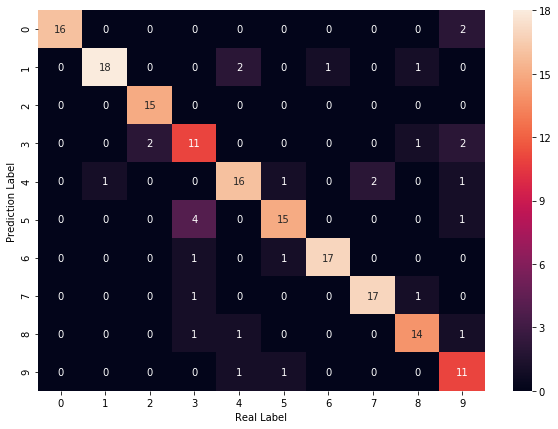

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:14 index:[6] real:5
#1 min_error:12 index:[2] real:2
#2 min_error:12 index:[8] real:8
#3 min_error:5 index:[0] real:0
#4 min_error:8 index:[1] real:1
#5 min_error:4 index:[7] real:7
#6 min_error:4 index:[6] real:6
#7 min_error:9 index:[3] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:8 index:[1] real:1
#10 min_error:15 index:[4 7] real:7
#11 min_error:14 index:[8] real:4
#12 min_error:2 index:[6] real:6
#13 min_error:6 index:[3] real:3
#14 min_error:9 index:[1] real:1
#15 min_error:12 index:[8] real:3
#16 min_error:13 index:[4] real:9
#17 min_error:8 index:[1] real:1
#18 min_error:10 index:[7] real:7
#19 min_error:2 index:[6] real:6
#20 min_error:12 index:[8] real:8
#21 min_error:6 index:[4] real:4
#22 min_error:6 index:[3] real:3
#23 min_error:9 index:[1] real:1
#24 min_error:5 index:[4] real:4
#25 min_error:9 index:[0] real:0
#26 min_error:13 index:[5] real:5
#27 min_error:5 index:[3] real:3
#28 min_error:6 index:[6] real:6
#29 min_error:15 index:[9] real:9
#30 min

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8818800247371676
Avg Base Learner:0.8200783343640485


In [16]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.26666666666666666
Accuracy on training set: 0.37777777777777777
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.45555555555555555
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.65
Accuracy on training set: 0.65
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.7222222222222222
Accuracy on training set: 0.7222222222222222
Accuracy on training set: 0.7222222222222222
Accuracy on training set: 0.7277777777777777
Accuracy on training set: 0.7222222222222222
Accuracy on training set: 0.7111111111111111
Accuracy on training set: 0.7388

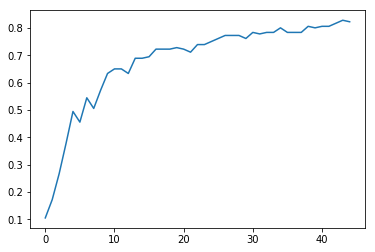

In [17]:
plt.plot(range(45),list_acc)
plt.show()

In [18]:
list_acc

[0.10555555555555556,
 0.17222222222222222,
 0.26666666666666666,
 0.37777777777777777,
 0.49444444444444446,
 0.45555555555555555,
 0.5444444444444444,
 0.5055555555555555,
 0.5722222222222222,
 0.6333333333333333,
 0.65,
 0.65,
 0.6333333333333333,
 0.6888888888888889,
 0.6888888888888889,
 0.6944444444444444,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.7277777777777777,
 0.7222222222222222,
 0.7111111111111111,
 0.7388888888888889,
 0.7388888888888889,
 0.75,
 0.7611111111111111,
 0.7722222222222223,
 0.7722222222222223,
 0.7722222222222223,
 0.7611111111111111,
 0.7833333333333333,
 0.7777777777777778,
 0.7833333333333333,
 0.7833333333333333,
 0.8,
 0.7833333333333333,
 0.7833333333333333,
 0.7833333333333333,
 0.8055555555555556,
 0.8,
 0.8055555555555556,
 0.8055555555555556,
 0.8166666666666667,
 0.8277777777777777,
 0.8222222222222222]